In [32]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
from sklearn.cluster import KMeans

(1536, 2048, 3)


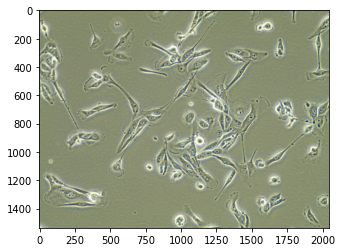

In [9]:
image = plt.imread('../data/images_jpeg/1401-8962.jpg')
print(image.shape)
plt.imshow(image)

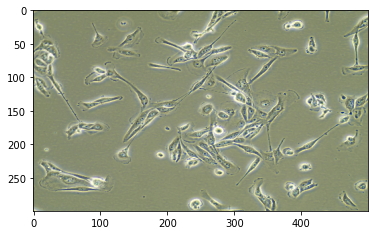

In [22]:
res = cv2.resize(image, dsize=(500,300))
plt.imshow(res)

(300, 500)


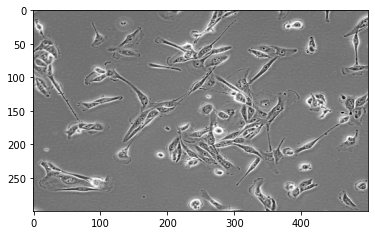

In [23]:
gray = rgb2gray(res)
print(gray.shape)
plt.imshow(gray, cmap='gray')

### Region-based Segmentation

#### Mean as threshold 

In [31]:
gray_r.mean()

1.6497

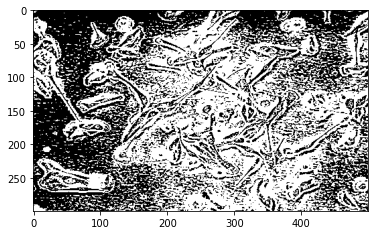

In [24]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

#### Multiple threshold

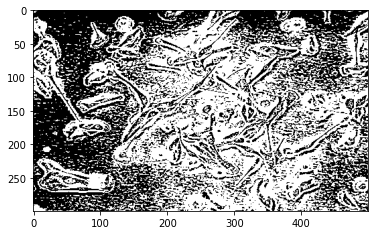

In [30]:
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 1:
        gray_r[i] = 2
    elif gray_r[i] > 1:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

### Image Segmentation based on Clustering

(1536, 2048, 3)


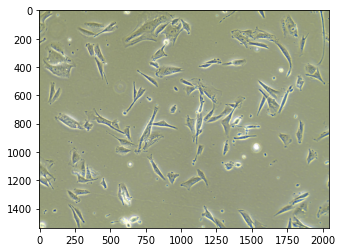

In [48]:
# dividing by 255 to bring the pixel values between 0 and 1
pic = plt.imread('../data/images_jpeg/1000-7807.jpg')/255  
print(pic.shape)
plt.imshow(pic)

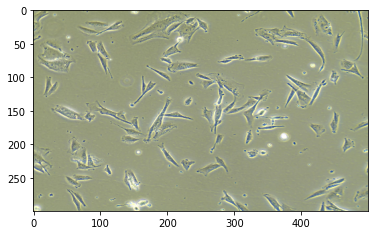

In [49]:
res = cv2.resize(pic, dsize=(500,300))
plt.imshow(res)

In [50]:
pic_n = res.reshape(res.shape[0]*res.shape[1], res.shape[2])
pic_n.shape

(150000, 3)

In [51]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

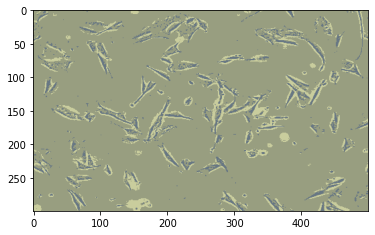

In [52]:
cluster_pic = pic2show.reshape(res.shape[0], res.shape[1], res.shape[2])
plt.imshow(cluster_pic)